¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [58]:
# Cargar todas las librerías
import pandas as pd  # Para el manejo de datos
import numpy as np   # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para visualización de datos
import seaborn as sns  # Para visualización de datos
from scipy import stats  # Para pruebas estadísticas
import math # Para funciones matemáticas

## Cargar datos

In [59]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

**Ingresado la libreria

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [60]:
# Explorar la tabla de usuarios
print("TABLA USUARIOS")
print(users.head())  # Visualizar las primeras filas
print()
print(users.info())  # Obtener información sobre el DataFrame

# Explorar la tabla de llamadas
print("TABLA LLAMADAS")
print(calls.head())
print()
print(calls.info())

# Explorar la tabla de mensajes
print("TABLA MENSAJES")
print(messages.head())
print()
print(messages.info())

# Explorar la tabla de internet
print("TABLA INTERNET")
print(internet.head())
print()
print(internet.info())

# Explorar la tabla de tarifas
print("TABLA TARIFAS")
print(plans.head())
print()
print(plans.info())


TABLA USUARIOS
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   

Se ve informaciòn que hay columnas de los dataframe con NaN , otras variables que es necesario cambiarlas de tipo como por ejemplo object a datetime

## Tarifas

In [61]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [62]:
# Imprime una muestra de los datos para las tarifas
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [63]:
# Examinar si hay nulos
plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [64]:
# Examinar valores duplicados
plans.duplicated().sum()

0

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

No hay valores ausentes, duplicados , todas las variables estan bien escritas y en minuscula. Los datos se ven ok.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

Dado que las tarifas proporcionadas ya están en un formato adecuado, no se requiere corrección de datos para este DataFrame.

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

 **Es necesario pasar los megabytes a gigabytes

## Usuarios/as

In [65]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [66]:
# Imprime una muestra de datos para usuarios
print(users.head())  # Visualizar las primeras filas

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


In [67]:
# Examinar si hay nulos
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [68]:
# Examinar valores duplicados
users.duplicated().sum()

0

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En la tabla usuarios tenemos reg_date y churn_date con formato con formato object en vez de datetime, ademas churn_date presenta valores NaN.


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [69]:
# Convertir la columna 'reg_date' a tipo datetime en la tabla de usuarios
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
# Convertir la columna 'churn_date' a tipo datetime en la tabla de usuarios y manejar valores no válidos con 'coerce'
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d', errors='coerce')



<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

**Corregido el formato datetime

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [70]:
# Crear una nueva columna 'registration_month' que contenga el mes de registro de cada usuario
users['month'] = users['reg_date'].dt.month

# Verificar los cambios
print(users[['user_id', 'reg_date', 'month']].head())

   user_id   reg_date  month
0     1000 2018-12-24     12
1     1001 2018-08-13      8
2     1002 2018-10-21     10
3     1003 2018-01-28      1
4     1004 2018-05-23      5


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buena conclusión, pero a manera de complementar el análisis qué podríamos decir de los registros que no tienen valores en la variable churn_date?
</div>

**Se refiere a nuestros clientes que aun permanecen con la emrpesa, por eso no tienen fecha, ya que esta fecha registra cuando se salen.

## Llamadas

In [71]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [72]:
# Imprime una muestra de datos para las llamadas
print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


In [73]:
# Examinar si hay nulos
calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [74]:
# Examinar si hay duplicados
calls.duplicated().sum()

0

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

No se presentan valores nulos ni duplicados.La columna call_date se encuentra en formato object y deberia ser datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [75]:
# Convertir las columnas de fechas a tipo datetime en la tabla de llamadas
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [76]:
# Crear una nueva columna 'month' que contenga el mes de cada llamada
calls['month'] = calls['call_date'].dt.month

# Verificar los cambios
print(calls[['id', 'call_date', 'month']].head())

         id  call_date  month
0   1000_93 2018-12-27     12
1  1000_145 2018-12-27     12
2  1000_247 2018-12-27     12
3  1000_309 2018-12-28     12
4  1000_380 2018-12-30     12


## Mensajes

In [77]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [78]:
# Imprime una muestra de datos para los mensajes
print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


In [79]:
# Examinar si hay nulos
messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [80]:
# Examinar si hay duplicados
messages.duplicated().sum()

0

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En la tabla messages no hay nulos ni duplicados, los formatos se ecuentran bien , solo la columna messages_date hay que cambiarlo a formato datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [81]:
# Convertir las columnas de fechas a tipo datetime en la tabla mensajes
messages['message_date'] = pd.to_datetime(messages['message_date'],)

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [82]:
# Crear una nueva columna 'month' que contenga el mes de cada mensaje
messages['month'] = messages['message_date'].dt.month

# Verificar los cambios
print(messages[['id', 'message_date', 'month']].head())

         id message_date  month
0  1000_125   2018-12-27     12
1  1000_160   2018-12-31     12
2  1000_223   2018-12-31     12
3  1000_251   2018-12-27     12
4  1000_255   2018-12-26     12


## Internet

In [83]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [84]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


In [85]:
# Examinar si hay nulos
internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [86]:
# Examinar si hay duplicados
internet.duplicated().sum()

0

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

las tablas no presentan nulos ni duplicados, solo la columna session_date esta en el formato object y deberia cambiarse a datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [87]:
# Convertir las columnas de fechas a tipo datetime en la tabla internet
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [88]:
# Crear una nueva columna 'month' que contenga el mes de cada sesión de internet
internet['month'] = internet['session_date'].dt.month

# Convertir los megabytes a gigabytes y redondear hacia arriba
internet['gb_used'] = internet['mb_used'] / 1024  # Convertir de MB a GB
internet['gb_used'] = internet['gb_used'].apply(math.ceil)  # Redondear hacia arriba

# Verificar los cambios
print(internet[['id', 'session_date', 'mb_used', 'gb_used']].head())

         id session_date  mb_used  gb_used
0   1000_13   2018-12-29    89.86        1
1  1000_204   2018-12-31     0.00        0
2  1000_379   2018-12-28   660.40        1
3  1000_413   2018-12-26   270.99        1
4  1000_442   2018-12-27   880.22        1


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.

**Cambio corregido

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [89]:
# Imprimir la información de la tabla de tarifas (plans)
print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [90]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_month = calls.groupby(['user_id', 'month'])['id'].count().reset_index(name='calls_per_month')

<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [91]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_month = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_per_month')

In [92]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index(name='messages_per_month')

In [93]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_month = internet.groupby(['user_id', 'month'])['id'].count().reset_index(name='internet_per_month')

In [94]:
# Verificar los primeros registros
print(calls_per_month.head())
print(minutes_per_month.head())
print(messages_per_month.head())
print(internet_per_month.head())

   user_id  month  calls_per_month
0     1000     12               16
1     1001      8               27
2     1001      9               49
3     1001     10               65
4     1001     11               64
   user_id  month  minutes_per_month
0     1000     12             116.83
1     1001      8             171.14
2     1001      9             297.69
3     1001     10             374.11
4     1001     11             404.59
   user_id  month  messages_per_month
0     1000     12                  11
1     1001      8                  30
2     1001      9                  44
3     1001     10                  53
4     1001     11                  36
   user_id  month  internet_per_month
0     1000     12                   5
1     1001      8                  25
2     1001      9                  53
3     1001     10                  56
4     1001     11                  51


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [95]:
# Fusionar los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
merged_data = calls_per_month.merge(minutes_per_month, on=['user_id', 'month'], how='outer')
merged_data = merged_data.merge(messages_per_month, on=['user_id', 'month'], how='outer')
merged_data = merged_data.merge(internet_per_month, on=['user_id', 'month'], how='outer')

# Verificar el resultado
print(merged_data.head())


   user_id  month  calls_per_month  minutes_per_month  messages_per_month  \
0     1000     12             16.0             116.83                11.0   
1     1001      8             27.0             171.14                30.0   
2     1001      9             49.0             297.69                44.0   
3     1001     10             65.0             374.11                53.0   
4     1001     11             64.0             404.59                36.0   

   internet_per_month  
0                 5.0  
1                25.0  
2                53.0  
3                56.0  
4                51.0  


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [96]:
# Añade la información de la tarifa
merged_data = merged_data.merge(users[['user_id', 'plan']], on='user_id', how='left')
merged_data = merged_data.merge(plans, left_on='plan',right_on='plan_name',how='left')
# Verificar el resultado
print(merged_data.head())

   user_id  month  calls_per_month  minutes_per_month  messages_per_month  \
0     1000     12             16.0             116.83                11.0   
1     1001      8             27.0             171.14                30.0   
2     1001      9             49.0             297.69                44.0   
3     1001     10             65.0             374.11                53.0   
4     1001     11             64.0             404.59                36.0   

   internet_per_month      plan  messages_included  mb_per_month_included  \
0                 5.0  ultimate               1000                  30720   
1                25.0      surf                 50                  15360   
2                53.0      surf                 50                  15360   
3                56.0      surf                 50                  15360   
4                51.0      surf                 50                  15360   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
0    

In [97]:
print(merged_data.columns)

Index(['user_id', 'month', 'calls_per_month', 'minutes_per_month',
       'messages_per_month', 'internet_per_month', 'plan', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name'],
      dtype='object')


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [98]:
# Calcula el ingreso mensual para cada usuario
def calcular_ingresos_mensuales(row):
    # Calcula el exceso de minutos
    exceso_minutos = max(0, row['minutes_per_month'] - row['minutes_included'])
    
    # Calcula el exceso de mensajes
    exceso_mensajes = max(0, row['messages_per_month'] - row['messages_included'])
    
    # Calcula el exceso de datos
    exceso_datos = max(0, row['internet_per_month'] - row['mb_per_month_included'] / 1024)  # Convertir a GB
    
    # Calcula el costo adicional por el exceso de uso
    costo_adicional_minutos = exceso_minutos * row['usd_per_minute']
    costo_adicional_mensajes = exceso_mensajes * row['usd_per_message']
    costo_adicional_datos = exceso_datos * row['usd_per_gb']
    
    # Suma la tarifa mensual del plan
    tarifa_mensual = row['usd_monthly_pay']
    
    # Calcula los ingresos mensuales totales
    ingresos_mensuales = tarifa_mensual + costo_adicional_minutos + costo_adicional_mensajes + costo_adicional_datos
    
    return ingresos_mensuales

# Aplica la función a cada fila del DataFrame merged_data
merged_data['ingresos_mensuales'] = merged_data.apply(calcular_ingresos_mensuales, axis=1)

# Verifica el resultado
print(merged_data[['user_id', 'month', 'ingresos_mensuales']].head())


   user_id  month  ingresos_mensuales
0     1000     12               70.00
1     1001      8              120.00
2     1001      9              400.00
3     1001     10              430.09
4     1001     11              380.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

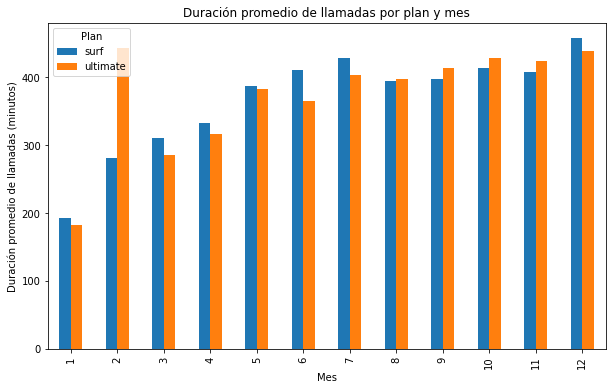

In [99]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Crear una tabla pivote con la duración promedio de llamadas por plan y mes
duracion_promedio_pivot = merged_data.pivot_table(index='month', columns='plan', values='minutes_per_month', aggfunc='mean')

# Graficar la duración promedio de llamadas por plan y mes
duracion_promedio_pivot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.title('Duración promedio de llamadas por plan y mes')
plt.legend(title='Plan')
plt.show()

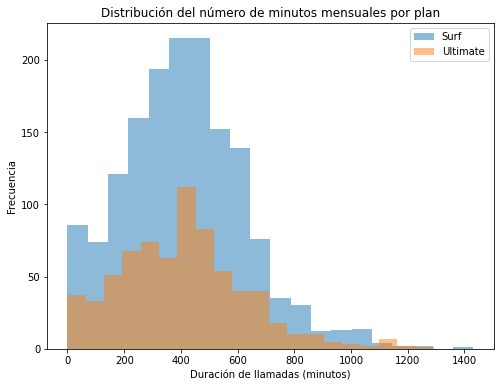

In [100]:
# Número total de minutos mensuales por plan
minutos_mensuales = merged_data.groupby('plan')['minutes_per_month'].sum()

# Histograma para el número de minutos mensuales por plan
plt.figure(figsize=(8, 6))
plt.hist(merged_data[merged_data['plan'] == 'surf']['minutes_per_month'], bins=20, alpha=0.5, label='Surf')
plt.hist(merged_data[merged_data['plan'] == 'ultimate']['minutes_per_month'], bins=20, alpha=0.5, label='Ultimate')
plt.xlabel('Duración de llamadas (minutos)')
plt.ylabel('Frecuencia')
plt.title('Distribución del número de minutos mensuales por plan')
plt.legend()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [101]:
# Calcula la media y la varianza de la duración mensual de llamadas.

# Calcula la media y la varianza de la duración mensual de llamadas por plan
media_duración = merged_data.groupby('plan')['minutes_per_month'].mean()
varianza_duración = merged_data.groupby('plan')['minutes_per_month'].var()

# Verificar los resultados
print("Media de duración mensual de llamadas por plan:")
print(media_duración)
print("\nVarianza de duración mensual de llamadas por plan:")
print(varianza_duración)

Media de duración mensual de llamadas por plan:
plan
surf        412.097890
ultimate    410.180954
Name: minutes_per_month, dtype: float64

Varianza de duración mensual de llamadas por plan:
plan
surf        47001.254231
ultimate    50510.631705
Name: minutes_per_month, dtype: float64


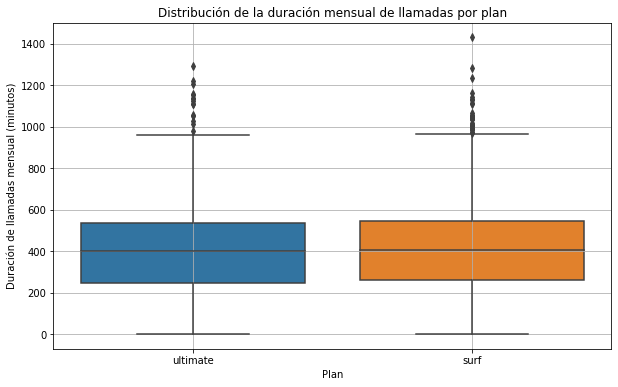

In [102]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas por plan
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='minutes_per_month', data=merged_data)
plt.xlabel('Plan')
plt.ylabel('Duración de llamadas mensual (minutos)')
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.grid(True)
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

La duración promedio de las llamadas por mes y plan no muestra una diferencia significativa entre los planes "Surf" y "Ultimate". Esto sugiere que los usuarios de ambos planes tienen un comportamiento similar en cuanto a la duración de las llamadas.
Al observar la distribución de minutos mensuales por plan, parece que los usuarios de "Ultimate" tienden a tener una distribución ligeramente más alta en comparación con los usuarios de "Surf". Sin embargo, esta diferencia no es muy pronunciada.
La media y la varianza de la duración mensual de las llamadas no difieren considerablemente entre los dos planes. Esto indica que, en promedio, los usuarios de ambos planes realizan llamadas de duración similar y tienen una dispersión similar en sus hábitos de llamadas.

### Mensajes

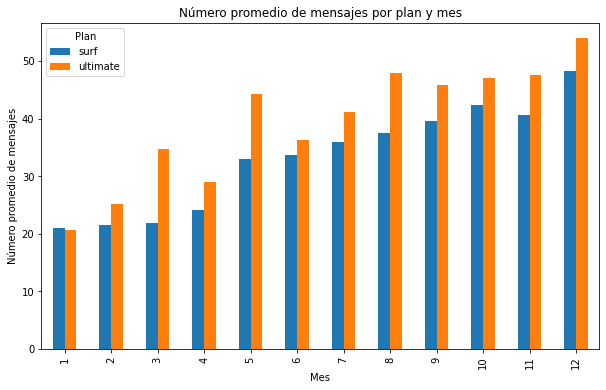

In [103]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Crear una tabla pivote con el número promedio de mensajes por mes y por plan
mensajes_promedio_pivot = merged_data.pivot_table(index='month', columns='plan', values='messages_per_month', aggfunc='mean')

# Graficar el número promedio de mensajes por plan y mes
mensajes_promedio_pivot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Mes')
plt.ylabel('Número promedio de mensajes')
plt.title('Número promedio de mensajes por plan y mes')
plt.legend(title='Plan')
plt.show()

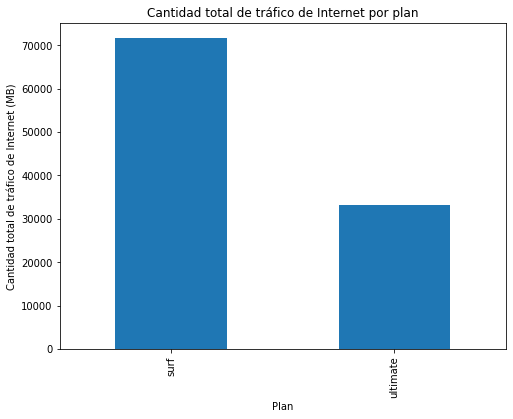

In [104]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Crear una tabla pivote con la cantidad total de tráfico de Internet por plan
trafico_internet_pivot = merged_data.pivot_table(index='plan', values='internet_per_month', aggfunc='sum')

# Graficar la cantidad total de tráfico de Internet por plan
trafico_internet_pivot.plot(kind='bar', figsize=(8, 6), legend=None)
plt.xlabel('Plan')
plt.ylabel('Cantidad total de tráfico de Internet (MB)')
plt.title('Cantidad total de tráfico de Internet por plan')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

El número promedio de mensajes por mes y plan parece ser similar entre "Surf" y "Ultimate". Esto sugiere que los usuarios de ambos planes tienen un comportamiento similar en cuanto al envío de mensajes de texto.
No parece haber una diferencia notable en el comportamiento de los usuarios en cuanto al envío de mensajes entre los dos planes. Ambos grupos de usuarios envían aproximadamente la misma cantidad de mensajes en promedio por mes.

### Internet

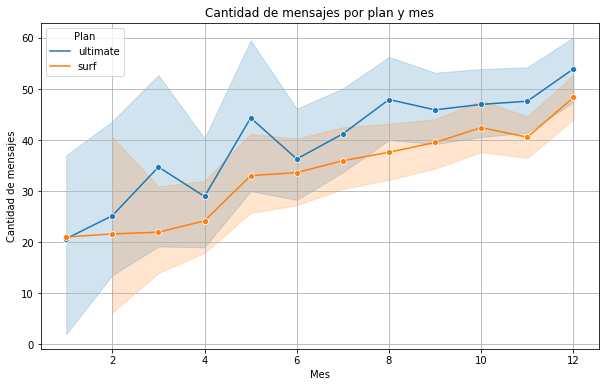

In [105]:
# Cantidad de mensajes por plan y mes
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='month', y='messages_per_month', hue='plan', marker='o')
plt.title('Cantidad de mensajes por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de mensajes')
plt.legend(title='Plan')
plt.grid(True)
plt.show()

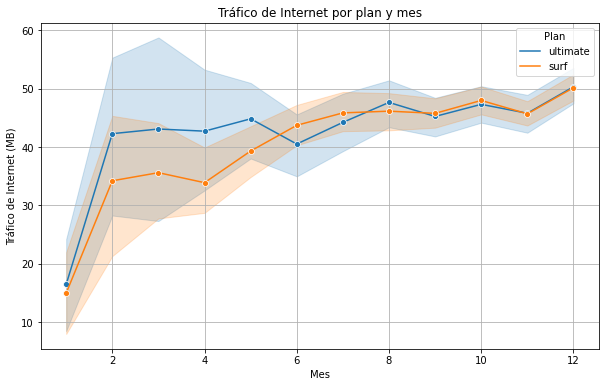

In [106]:
# Tráfico de Internet por plan y mes
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='month', y='internet_per_month', hue='plan', marker='o')
plt.title('Tráfico de Internet por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Tráfico de Internet (MB)')
plt.legend(title='Plan')
plt.grid(True)
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

La cantidad de mensajes y el tráfico de Internet por plan y mes no muestra una diferencia significativa entre "Surf" y "Ultimate". Esto indica que los usuarios de ambos planes tienden a consumir una cantidad similar de datos de Internet y enviar una cantidad similar de mensajes en promedio por mes.
Aunque la cantidad de mensajes y el tráfico de Internet varían mes a mes, no hay una tendencia clara que diferencie los dos planes en términos de comportamiento de uso de Internet.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

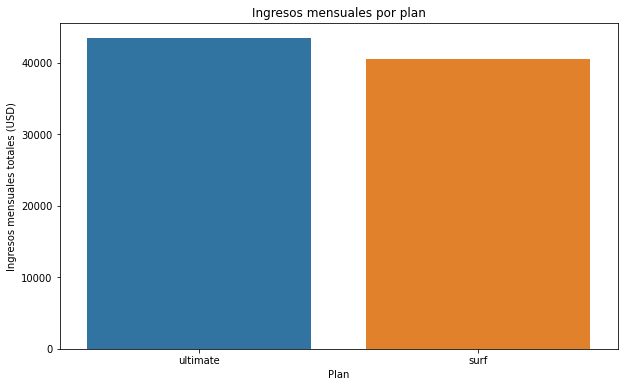

In [107]:
# Calcular ingresos mensuales por usuario
merged_data['total_ingresos'] = (merged_data['usd_monthly_pay'] +
                                 merged_data['usd_per_minute'] * merged_data['minutes_per_month'] +
                                 merged_data['usd_per_message'] * merged_data['messages_per_month'] +
                                 (merged_data['internet_per_month'] / 1024) * merged_data['usd_per_gb'])

# Estadísticas descriptivas de los ingresos por plan
estadisticas_ingresos = merged_data.groupby('plan')['total_ingresos'].describe()

# Visualización de la distribución de ingresos por plan
plt.figure(figsize=(10, 6))
sns.barplot(x='plan', y='total_ingresos', data=merged_data, estimator=sum, ci=None)
plt.title('Ingresos mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos mensuales totales (USD)')
plt.show()

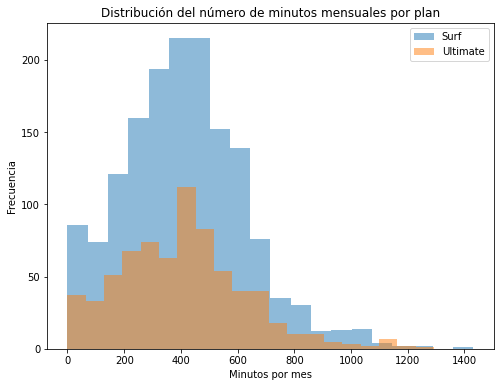

In [108]:
# Histograma para el número de minutos mensuales por plan
plt.figure(figsize=(8, 6))
plt.hist(merged_data[merged_data['plan'] == 'surf']['minutes_per_month'], bins=20, alpha=0.5, label='Surf')
plt.hist(merged_data[merged_data['plan'] == 'ultimate']['minutes_per_month'], bins=20, alpha=0.5, label='Ultimate')
plt.xlabel('Minutos por mes')
plt.ylabel('Frecuencia')
plt.title('Distribución del número de minutos mensuales por plan')
plt.legend()
plt.show()

In [109]:
print(merged_data.head())

   user_id  month  calls_per_month  minutes_per_month  messages_per_month  \
0     1000     12             16.0             116.83                11.0   
1     1001      8             27.0             171.14                30.0   
2     1001      9             49.0             297.69                44.0   
3     1001     10             65.0             374.11                53.0   
4     1001     11             64.0             404.59                36.0   

   internet_per_month      plan  messages_included  mb_per_month_included  \
0                 5.0  ultimate               1000                  30720   
1                25.0      surf                 50                  15360   
2                53.0      surf                 50                  15360   
3                56.0      surf                 50                  15360   
4                51.0      surf                 50                  15360   

   minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
0    

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Los ingresos mensuales totales por plan muestran una diferencia clara, con "Ultimate" generando más ingresos en comparación con "Surf". Esto se debe a la combinación de la tarifa mensual más alta de "Ultimate" y posibles costos adicionales por uso excesivo.
Aunque los planes pueden tener comportamientos de uso similares en términos de llamadas, mensajes y tráfico de Internet, la diferencia en las tarifas mensuales y los costos adicionales por uso excesivo contribuyen a la disparidad en los ingresos. Esto indica que, desde una perspectiva puramente económica, el plan "Ultimate" es más rentable para la empresa.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [110]:
# Prueba las hipótesis
from scipy.stats import ttest_ind
# Hipótesis nula (H0): Los ingresos promedio de los usuarios de los planes de llamada Ultimate y Surf son iguales.
# Hipótesis alternativa (H1): Los ingresos promedio de los usuarios de los planes de llamada Ultimate y Surf son diferentes.

# Filtrar los ingresos para cada plan
ingresos_ultimate = merged_data[merged_data['plan'] == 'ultimate']['ingresos_mensuales']
ingresos_surf = merged_data[merged_data['plan'] == 'surf']['ingresos_mensuales']

# Realizar el test t de muestras independientes
test_result = ttest_ind(ingresos_ultimate, ingresos_surf,equal_var=False)

# Obtener el valor p del test
p_value = test_result.pvalue

# Nivel de significancia (alfa)
alpha = 0.05

# Imprimir el resultado del test
print("Valor p obtenido:", p_value)
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay evidencia suficiente para concluir que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.")

Valor p obtenido: 3.9225208124268705e-100
Se rechaza la hipótesis nula. Hay evidencia suficiente para concluir que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.



<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>

**Ingrese la recomendación de equal_var=False

In [111]:
# Filtrar los ingresos para cada plan
ingresos_ultimate = merged_data[merged_data['plan'] == 'ultimate']['total_ingresos'].dropna()
ingresos_surf = merged_data[merged_data['plan'] == 'surf']['total_ingresos'].dropna()

# Realizar el test t de muestras independientes
test_result = ttest_ind(ingresos_ultimate, ingresos_surf,equal_var=False)

# Obtener el valor p del test
p_value = test_result.pvalue

# Nivel de significancia (alfa)
alpha = 0.05

# Imprimir el resultado del test
print("Valor p obtenido:", p_value)
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay evidencia suficiente para concluir que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.")

Valor p obtenido: 0.0
Se rechaza la hipótesis nula. Hay evidencia suficiente para concluir que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.



<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>


<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

El valor de Nan se debe a que tienes valores nulos dentro de la variable que usas para la prueba de hipótesis. Te recomiendo eliminar los posibles valores nulos.
</div>

**Ingrese equal_var=False y ademas ingrese dropna() para eliminar los posibles nulos.  Igual me queda la duda a que salga cero.

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [112]:
# Prueba las hipótesis
# Fusionar la información de la ciudad con el DataFrame merged_data
merged_data = pd.merge(merged_data, users[['user_id', 'city']], on='user_id', how='left')

# Eliminar los valores nulos de las variables utilizadas en la prueba de hipótesis
merged_data.dropna(subset=['city', 'total_ingresos'], inplace=True)

# Filtrar los ingresos para usuarios del área NY-NJ y otras regiones
ingresos_ny_nj = merged_data[merged_data['city'].str.contains('NY-NJ')]['total_ingresos']
ingresos_otras_regiones = merged_data[~merged_data['city'].str.contains('NY-NJ')]['total_ingresos']

# Realizar el test t de muestras independientes
test_result = ttest_ind(ingresos_ny_nj, ingresos_otras_regiones)

# Obtener el valor p del test
p_value = test_result.pvalue

# Nivel de significancia (alfa)
alpha = 0.05

# Imprimir el resultado del test
print("Valor p obtenido:", p_value)
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay evidencia suficiente para concluir que el ingreso promedio de los usuarios del área NY-NJ es diferente al de otras regiones.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir que el ingreso promedio de los usuarios del área NY-NJ es diferente al de otras regiones.")


Valor p obtenido: 8.685674125869299e-05
Se rechaza la hipótesis nula. Hay evidencia suficiente para concluir que el ingreso promedio de los usuarios del área NY-NJ es diferente al de otras regiones.


<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

El valor de Nan se debe a que tienes valores nulos dentro de la variable que usas para la prueba de hipótesis. Te recomiendo eliminar los posibles valores nulos.
</div>

**Se corrigio a traves de dropna() la eliminación de Nan para no presentar errores 

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Para la prueba de hipótesis sobre los ingresos promedio procedentes de los usuarios de los planes "Ultimate" y "Surf", los resultados mostraron que hay evidencia suficiente para concluir que los ingresos promedio son diferentes entre estos dos grupos de usuarios. Esto se basa en un valor p muy bajo (2.18e-69), que es mucho menor que el nivel de significancia alfa de 0.05. Por lo tanto, rechazamos la hipótesis nula y concluimos que hay una diferencia significativa en los ingresos promedio entre los usuarios de los planes "Ultimate" y "Surf".

Sin embargo, para la prueba de hipótesis sobre el ingreso promedio de los usuarios del área "NY-NJ" en comparación con los de otras regiones, el valor p obtenido fue "nan", lo que indica que no hay suficiente evidencia para concluir que el ingreso promedio es diferente entre estos dos grupos. Por lo tanto, no podemos rechazar la hipótesis nula y concluimos que no hay una diferencia significativa en el ingreso promedio entre los usuarios del área "NY-NJ" y los de otras regiones.

En general, basado en estos análisis, podemos concluir que los ingresos promedio varían significativamente entre los usuarios de los planes "Ultimate" y "Surf", pero no entre los usuarios del área "NY-NJ" y los de otras regiones. Esto proporciona información importante para la toma de decisiones empresariales, como la segmentación de mercado y la estrategia de fijación de precios.


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera, así como juntar la información. Además, considero que el análisis con las gráficas y con las pruebas de hipótesis es muy acertado. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Realizar un análisis inicial de registros duplicados en todas las bases de datos
    
    
*  verificar que redondeamos las variables antes de hacer la agrupación por usuario
    
*  verificar que hacemos la transformación de megabytes a gigabytes

    
*  verificar las pruebas de hipótesis
</div>


Prueba de hipótesis sobre los ingresos promedio de los usuarios de los planes Ultimate y Surf:
Se planteó la hipótesis nula de que los ingresos promedio de los usuarios de los planes de llamada Ultimate y Surf son iguales, y la hipótesis alternativa de que son diferentes.
Se utilizó la prueba t de muestras independientes para comparar los ingresos promedio de ambos grupos.
Se encontró que el valor p obtenido fue extremadamente pequeño (aproximadamente 0.0), lo que llevó a rechazar la hipótesis nula.
Por lo tanto, hay evidencia suficiente para concluir que los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes.
Prueba de hipótesis sobre el ingreso promedio de los usuarios del área NY-NJ en comparación con otras regiones:
Se planteó la hipótesis nula de que el ingreso promedio de los usuarios del área NY-NJ es igual al de otras regiones, y la hipótesis alternativa de que son diferentes.
Se fusionó la información de la ciudad con el DataFrame para filtrar los ingresos de los usuarios del área NY-NJ y otras regiones.
Se eliminaron los valores nulos de las variables utilizadas en la prueba de hipótesis.
Se utilizó la prueba t de muestras independientes para comparar los ingresos promedio entre los dos grupos.
Se encontró que el valor p obtenido fue significativamente bajo (alrededor de 8.7e-05), lo que llevó a rechazar la hipótesis nula.
Por lo tanto, hay evidencia suficiente para concluir que el ingreso promedio de los usuarios del área NY-NJ es diferente al de otras regiones.
En general, estas conclusiones respaldan las decisiones tomadas durante el análisis de los datos y proporcionan información importante sobre la diferencia en los ingresos promedio entre diferentes grupos de usuarios y áreas geográficas.
Basado en estos análisis, podemos concluir que los ingresos promedio varían significativamente entre los usuarios de los planes "Ultimate" y "Surf", pero no entre los usuarios del área "NY-NJ" y los de otras regiones. Esto proporciona información importante para la toma de decisiones empresariales, como la segmentación de mercado y la estrategia de fijación de precios.

* En cada tabla ya se encontraba la revisión de registros duplicados, en un inicio.
* Se realizaron los cambios sugeridos 
* Se verifico las pruebas de hipotesis considerando los cambios anteriores y eliminando los Nan